# 使用 AI 解读 Tobit 模型

- 背景：学生读文献或课本，受限于基础，往往很难复杂的计量模型；但又找不到合适的老师咨询

- 目的：借助 AI 助手，帮助学生理解计量模型的原理、数学表述和经济学含义。

- 好处：
  - 可以根据自己的喜好产生生成 Stata 或 Python 代码，生成图形，甚至生成 LaTeX 公式。
  - 可以生成讲义风格的文字，帮助学生理解模型的经济学含义。
  - 可以生成代码注释，帮助学生理解代码的实现细节。
  - 可以让 AI 扮演某个角色 (如 {有二十年从教经验的计量经济学教授})，用大白话讲给 {高中生} 甚至是 {小学生}。总有一个版本能契合你的基础和思维方式。

## 简介

在学习计量经济学的过程中，许多学生常常会遇到复杂的模型和晦涩的数学推导，感到无从下手。由于缺乏合适的老师或同伴指导，理解这些内容变得更加困难。

AI 助手的出现，为学生们提供了全新的学习方式。通过 AI，学生不仅可以获得模型原理、数学表述和经济学含义的详细讲解，还能根据自己的需求生成 Stata 或 Python 代码、图形和 LaTeX 公式。

更重要的是，AI 能用讲义风格的文字和丰富的代码注释，帮助学生逐步掌握知识点。无论你的基础如何，AI 都可以用通俗易懂的语言，甚至模拟经验丰富的教授，帮助你找到最适合自己的学习路径。

本节的目的是通过 AI 助手，帮助学生理解 Tobit 模型的原理、数学表述和经济学含义。我们将展示如何使用 AI 生成相关内容，并提供实际的代码示例和图形展示。

我主要受到了 [Korinek (2023)](https://doi.org/10.1257/jel.20231736) 的启发。为了解读 Solow 模型的原理 ([Chat 50](https://www.aeaweb.org/content/file?id=21904))，Korinek 向 AI 发送了提示词 `Simulate the Solow growth model and plot the results in a four chart.`。AI 的解读效果非常好。


## 模拟 Tobit Model：Python 代码

::: {.callout-tip}
### 提示词

- 任务：写一段 {Python} 代码，模拟 Tobit Model 的数据，并酌情绘图。
  - N = 500；
  - 支持中文字符显示
  - 屏蔽 warning 信息
- 目的：帮助初学者理解 Tobit Model 的数据生成过程。
- 风格：讲义风格，核心代码要添加中文注释

:::

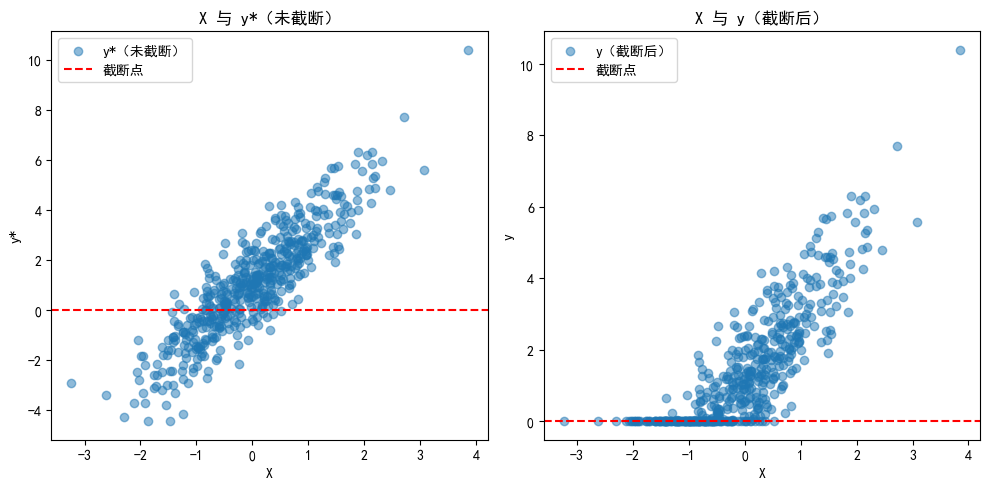

In [3]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')  # 屏蔽所有 warning 信息

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 设置随机种子，保证结果可复现
np.random.seed(42)

# 样本量
N = 500

# 生成自变量 X，服从标准正态分布
X = np.random.normal(0, 1, N)

# 设置 Tobit 模型的参数
beta_0 = 1.0   # 截距
beta_1 = 2.0   # 斜率
sigma = 1.0    # 残差标准差

# 生成潜在因变量 y*（未截断前的真实值）
y_star = beta_0 + beta_1 * X + np.random.normal(0, sigma, N)

# 设置截断点（左截断为0）
y = np.maximum(y_star, 0)

# 绘图：展示 Tobit 数据的分布
plt.figure(figsize=(10, 5))

# 散点图：X 与 y* 的关系
plt.subplot(1, 2, 1)
plt.scatter(X, y_star, alpha=0.5, label='y*（未截断）')
plt.axhline(0, color='red', linestyle='--', label='截断点')
plt.title('X 与 y*（未截断）')
plt.xlabel('X')
plt.ylabel('y*')
plt.legend()

# 散点图：X 与 y 的关系
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, label='y（截断后）')
plt.axhline(0, color='red', linestyle='--', label='截断点')
plt.title('X 与 y（截断后）')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## 模型设定和基本原理

::: {.callout-tip}
### 提示词

写一段讲义风格的文字，用 LaTeX 公式描述 Tobit Model 的模型设定和基本原理。

然后结合上面的代码和图形解释公式的经济学含义，最好能结合一些容易理解的实例。 

:::

Tobit 模型是一种用于处理因变量存在截断（如左截断为 0）的回归模型。其基本思想是：我们观测到的因变量 $y$，是一个潜在的连续变量 $y^*$ 被某个阈值截断后的结果。

### Tobit 模型的数学表述

Tobit 模型可表示为：

$$
\begin{align*}
y_i^* &= \beta_0 + \beta_1 x_i + \varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^2) \\
y_i &= \begin{cases}
y_i^*, & \text{如果 } y_i^* > 0 \\
0,    & \text{如果 } y_i^* \leq 0
\end{cases}
\end{align*}
$$

其中：

- $y_i^*$：不可观测的潜在因变量（如“理想消费”）
- $y_i$：实际观测到的因变量（如“实际消费”，不能为负）
- $x_i$：自变量
- $\beta_0, \beta_1$：回归系数
- $\varepsilon_i$：正态分布的误差项

### 经济学含义与实例

以家庭消费为例，$y_i^*$ 可以理解为家庭的“理想消费金额”，但由于某些家庭可能没有消费（如收入太低），实际观测到的消费 $y_i$ 就会被截断为 0。

在上面的代码中，我们模拟了 $N=500$ 个样本，生成了 $y^*$ 和 $y$。图形左侧展示了 $X$ 与 $y^*$ 的关系，可以看到 $y^*$ 是连续分布的；右侧展示了 $X$ 与 $y$ 的关系，所有 $y^* \leq 0$ 的点都被截断为 0，形成了“堆积”。

这种模型广泛用于：

- 消费/投资为零的情况（如部分家庭没有购房支出）
- 信贷申请/批准金额（如部分人未获批贷款）
- 劳动供给（如部分人未参与劳动市场）

Tobit 模型能有效处理这类“部分观测为零”的数据，避免 OLS 回归的偏误。

## Tobit 模型的详细数学推导

其实，仅仅依据上面的内容，你还是无法真正理解 Tobit 模型的数学公式和经济学含义。下面我们将详细推导 Tobit 模型的数学公式，并解释每一步的经济学含义。

我列举了一些提示词要点，你可以酌情选择使用。建议一次性不要给 AI 太多提示词，分步进行更容易获得满意的结果。

::: {.callout-tip}
### 提示词
写一段讲义风格的文字，详细推导 Tobit 模型的数学公式。包括：

1. 潜在变量 $y^*$ 的定义
2. 截断后的观测变量 $y$ 的定义
3. 期望值和条件期望值的推导
4. Tobit 和 OLS 估计式的关系
5. Tobit 模型的最大似然估计方法
6. Tobit 模型边际效应的计算方法和经济含义

:::

### 潜在变量 $y^*$ 的定义

Tobit 模型假设存在一个不可观测的潜在连续变量 $y^*$，其生成机制为：

$$
y_i^* = \beta_0 + \beta_1 x_i + \varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^2)
$$

其中，$x_i$ 是自变量，$\beta_0, \beta_1$ 为参数，$\varepsilon_i$ 为正态分布误差项。

我们实际观测到的因变量 $y_i$ 受到截断（如左截断为 0），数据生成过程为：

$$
y_i = \begin{cases}
y_i^*, & \text{如果 } y_i^* > 0 \\
0, & \text{如果 } y_i^* \leq 0
\end{cases}
$$

### $y$ 的期望值和条件期望值

Tobit 模型下，$y_i$ 的条件期望为：

$$
E[y_i|x_i] = P(y_i^* > 0|x_i) \cdot E[y_i^*|y_i^* > 0, x_i]
$$

其体推导如下：

- $P(y_i^* > 0|x_i) = 1 - \Phi\left(-\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)$，其中 $\Phi(\cdot)$ 为标准正态分布函数。
- $E[y_i^*|y_i^* > 0, x_i] = \beta_0 + \beta_1 x_i + \sigma \frac{\varphi\left(\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)}{1 - \Phi\left(-\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)}$，其中 $\varphi(\cdot)$ 为标准正态密度函数。

因此：

$$
E[y_i|x_i] = \left[1 - \Phi\left(-\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)\right] \left[\beta_0 + \beta_1 x_i + \sigma \frac{\varphi\left(\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)}{1 - \Phi\left(-\frac{\beta_0 + \beta_1 x_i}{\sigma}\right)}\right]
$$

### Tobit 和 OLS 估计式的关系

OLS 直接对 $y$ 回归会低估 $\beta_1$，因为截断导致大量 $y=0$ 的观测值，拉低了回归斜率。Tobit 模型通过最大似然法，利用了 $y=0$ 的概率信息，能更准确估计参数。

### 模型的最大似然估计方法

Tobit 模型的对数似然函数为，

$$
\ell(\beta_0, \beta_1, \sigma) = \sum_{y_i=0} \log \Phi\left(\frac{-(\beta_0 + \beta_1 x_i)}{\sigma}\right) + \sum_{y_i>0} \log \left[\frac{1}{\sigma} \varphi\left(\frac{y_i - \beta_0 - \beta_1 x_i}{\sigma}\right)\right]
$$


具中，第一项对应被截断的观测，第二项对应未被截断的观测。通过极大化该似然函数，得到参数估计值。

有关 MLE 估计方法介绍，参见如下推文：

  - 徐云娇, 连玉君, 2020, [Stata：数值求解极大值及 MLE 示例](https://www.lianxh.cn/details/468.html).
  - 曹昊煜, 2022, [Stata：最大似然估计入门教程(MLE)-ml](https://www.lianxh.cn/details/1039.html).
  - 王萃芳, 2022, [Stata：最大似然估计(MLE)简易教程](https://www.lianxh.cn/details/1120.html).


### Tobit 模型边际效应的计算方法和经济含义

Tobit 模型的系数 $\beta_1$ 并不是 $x$ 对 $y$ 的直接边际效应。$x$ 对 $E[y|x]$ 的边际效应为：

$$
\frac{\partial E[y|x]}{\partial x} = \beta_1 \cdot \Phi\left(\frac{\beta_0 + \beta_1 x}{\sigma}\right)
$$

其表示 $x$ 的影响被截断概率所“缩小”，只有未被截断的部分才体现出 $x$ 的真实效应。经济学上，这反映了自变量对“实际观测到的因变量”的平均影响。

## Tobit 和 OLS 对比

你还可以进步借助 AI 生成 Tobit 和 OLS 模型的估计结果图示，以便说明 OLS 估计可能存在的偏差。

这里用了教育学中一个非常重要的原理：知识迁移。在学习 Tobit 模型过程中，你可以借助对比，将已经掌握的 OLS 模型知识迁移到新的 Tobit 模型上。


::: {.callout-tip}
### 提示词

- 目的：编写 Python 代码，图示 Tobit 和 OLS 模型的估计结果，以便说明 OLS 估计可能存在的偏差
- 风格：讲义风格，核心代码要添加中文注释
- 代码要求：
  - 要能独立运行，不依赖与此前代码块的设定
  - 支持中文字符显示；屏蔽 warning 信息
:::

## 后续讨论

按照上述逻辑，你可以不断追问 AI，生成更多内容。这种学习模式与传统的课堂教学和硬啃教科书有很大区别。你完全可以根据自己的基础和需求，调整 AI 的提示词，让其生成最适合你的内容。

比如，你可以使用如下提示词追问：

::: {.callout-tip}
### 提示词

1. Tobit 模型如何估计？
2. 如何解释 Tobit 模型的系数含义？边际效应如何计算？
3. 有哪些 Tobit 模型的拓展模型？
4. 在因果推断中，有哪些与 Tobit 模型或者其模型设定思想相关的模型？它们的适用场景是什么？
5. 对于面板数据而言，有哪些主要的 Tobit 模型？
6. 帮我推荐 3-5 篇公司金融领域使用 Tobit 或相关模型进行实证分析的论文。要求：近 10 年发表的；仅限于 JFE, JF, RFS, JFQA, JCF, RFS 等顶级期刊；最好是有数据和代码的。

:::

> [ChatGPT 对话过程](https://chatgpt.com/share/688370e0-180c-8005-b6ea-d1a34c01dfb6)

## 参考文献

- Korinek, A. (2023). Generative AI for Economic Research: Use Cases and Implications for Economists. Journal of Economic Literature, 61(4), 1281–1317. [Link](https://doi.org/10.1257/jel.20231736) (rep), [PDF](https://genaiforecon.org/JEL-2023-1736_published.pdf), [Appendix](https://www.aeaweb.org/doi/10.1257/jel.20231736.appx), [Google](<https://scholar.google.com/scholar?q=Generative AI for Economic Research: Use Cases and Implications for Economists>). 
  - [更新 1：2024 版全文更新](https://www.aeaweb.org/content/file?id=21904)
  - [更新 2：提供了很多 Prompts](https://www.aeaweb.org/content/file?id=21046)